# 1. 단계별 변수 선택법
# 2. 전진선택법
# 3. 후진소거법

In [24]:
# 모듈 가져오기
import pandas as pd
from statsmodels.api import add_constant
from sklearn.model_selection import train_test_split
from statsmodels.api import OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.api import qqplot

In [2]:
# 데이터 가져오기 - 도요타 중고차 가격 데이터
Toyota = pd.read_csv('./Data/ToyotaCorolla.csv')

In [3]:
# 데이터 확인하기 - head()
Toyota.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
# 데이터 정보 확인
Toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Automatic         1436 non-null   int64 
 11  cc                1436 non-null   int64 
 12  Doors             1436 non-null   int64 
 13  Cylinders         1436 non-null   int64 
 14  Gears             1436 non-null   int64 
 15  Quarterly_Tax     1436 non-null   int64 
 16  Weight            1436 non-null   int64 
 17  Mfr_Guarantee 

In [5]:
# 모델링을 통한 회귀가 목적이므로 변수들이 모두 수치형 변수여야 한다.
# 따라서, object 타입의 데이터를 확인 후, 더미화 시킨다
Toyota['Fuel_Type'].unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [6]:
# Fuel_Type -> 더미화
dummies = pd.get_dummies(Toyota['Fuel_Type'])

In [7]:
# 데이터 확인
dummies

,CNG,Diesel,Petrol
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1431,0,0,1
1432,0,0,1
1433,0,0,1
1434,0,0,1


In [8]:
# 불필요한 변수 제거 및 더비변수 추가
remove_cols = ['Id', 'Model', 'Fuel_Type']
tmp = Toyota.drop(remove_cols, axis = 1)

In [9]:
# 데이터 확인
tmp

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,13500,23,10,2002,46986,90,1,0,2000,3,...,1,1,1,0,0,0,1,0,0,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,1,0,1,0,0,0,1,0,0,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,1,0,0,0,1,0,0,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,1,0,0,0,1,0,0,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,12,1998,20544,86,1,0,1300,3,...,1,1,1,0,1,1,1,0,0,0
1432,10845,72,9,1998,19000,86,0,0,1300,3,...,0,0,1,0,0,1,1,0,0,0
1433,8500,71,10,1998,17016,86,0,0,1300,3,...,0,0,1,0,0,0,1,0,0,0
1434,7250,70,11,1998,16916,86,1,0,1300,3,...,0,0,0,0,0,0,1,0,0,0


In [10]:
# 데이터 확인
toyota_new = pd.concat([tmp, dummies], axis = 1)
toyota_new

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,CNG,Diesel,Petrol
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,12,1998,20544,86,1,0,1300,3,...,0,1,1,1,0,0,0,0,0,1
1432,10845,72,9,1998,19000,86,0,0,1300,3,...,0,0,1,1,0,0,0,0,0,1
1433,8500,71,10,1998,17016,86,0,0,1300,3,...,0,0,0,1,0,0,0,0,0,1
1434,7250,70,11,1998,16916,86,1,0,1300,3,...,0,0,0,1,0,0,0,0,0,1


In [11]:
# 회귀 모델링을 위한 상수 추가 - add_constant
df_reg = add_constant(toyota_new, has_constant = 'add')
df_reg.head()

,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,CNG,Diesel,Petrol
0,1.0,13500,23,10,2002,46986,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
1,1.0,13750,23,10,2002,72937,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
2,1.0,13950,24,9,2002,41711,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
3,1.0,14950,26,7,2002,48000,90,0,0,2000,...,0,0,0,1,0,0,0,0,1,0
4,1.0,13750,30,3,2002,38500,90,0,0,2000,...,0,1,0,1,0,0,0,0,1,0


In [12]:
# 데이터 분할
X = df_reg.drop('Price', axis = 1)
y = df_reg['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7, random_state = 42)

print("데이터 분할상태 확인")
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

def pvalue_process(X_train, X_test, y_train):
    # 훈련데이터 학습
    full_model = OLS(y_train, X_train)
    full_model_fit = full_model.fit()

    # 통계적으로 유의미하지 않은 변수 제거
    parameters = full_model_fit.params.index
    pvalues = full_model_fit.pvalues
    pvalue_max = pvalues.max()
    while pvalue_max >= 0.05:
        parameters = full_model_fit.params.index
        pvalues = full_model_fit.pvalues
        pvalue_max = pvalues.max()
        for idx, pval in enumerate(pvalues):
            if pval == pvalue_max:
                remove_cols.append(parameters[idx])
                # 제거된 변수를 제외한 나머지 변수들로 새롭게 데이터 정의
                X_train = X_train.drop(remove_cols[-1], axis = 1)
                X_test = X_test.drop(remove_cols[-1], axis = 1)
                full_model = OLS(y_train, X_train)
                full_model_fit = full_model.fit()
    else:
        pass
    return full_model_fit, X_train, X_test

데이터 분할상태 확인
(1005, 37) (431, 37) (1005,) (431,)


In [13]:
# 다중공선성 확인
def multicolinearity(X_train, X_test):
    models = list()
    VIF = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    VIF_max = np.array(VIF).max()
    while VIF_max > 5:
        VIF = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        VIF_max = np.array(VIF).max()
        for idx, vif in enumerate(VIF):
            if vif == VIF_max:
                remove_cols.append(X_train.columns[idx])
                # 제거된 변수를 제외한 나머지 변수들로 새롭게 데이터 정의
                X_train = X_train.drop(remove_cols[-1], axis = 1)
                X_test = X_test.drop(remove_cols[-1], axis = 1)
                full_model = OLS(y_train, X_train)
                full_model_fit = full_model.fit()
                
            else:
                pass
    return full_model_fit, VIF, X_train, X_test

In [14]:
pvalue_process(X_train, X_test, y_train)[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              5572.
Date:                Mon, 19 Oct 2020   Prob (F-statistic):                        0.00
Time:                        23:42:29   Log-Likelihood:                         -8451.7
No. Observations:                1005   AIC:                                  1.694e+04
Df Residuals:                     986   BIC:                                  1.703e+04
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Age_08_04         -119.4720      3.623    -32.977      0.000    -126.581    -112.363
Mfg_Month         -102.4611     10.377     -9.873      0.000    -122.826     -82.097
KM                  -0.0157      0.001    -11.816      0.000      -0.018      -0.013
HP                  12.7580      3.400      3.752      0.000       6.086      19.430
Quarterly_Tax       12.0626      1.767      6.826      0.000       8.595      15.531
Weight              15.0074      0.431     34.855      0.000      14.163      15.852
Mfr_Guarantee      151.7916     75.877      2.000      0.046       2.892     300.691
BOVAG_Guarantee    506.8044    125.788      4.029      0.000     259.961     753.647
Guarantee_Period    74.6962     13.239      5.642      0.000      48.716     100.677
ABS               -393.8542     99.528     -3.957      0.000    -589.165    -198.543
Airco              237.2732     88.758      2.673      0.008      63.097     411.450
Automatic_airco   2305.4415    183.023     12.596      0.000    1946.282    2664.601
Boardcomputer     -415.5939    119.017     -3.492      0.001    -649.149    -182.039
CD_Player          240.0376    101.013      2.376      0.018      41.812     438.264
Powered_Windows    318.5770     84.872      3.754      0.000     152.026     485.128
Sport_Model        196.8089     82.126      2.396      0.017      35.648     357.970
Tow_Bar           -191.8429     80.742     -2.376      0.018    -350.289     -33.396
CNG              -2020.4116    398.415     -5.071      0.000   -2802.251   -1238.572
Diesel           -1668.3335    266.976     -6.249      0.000   -2192.239   -1144.428
==============================================================================
Omnibus:                       76.159   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              309.590
Skew:                           0.220   Prob(JB):                     5.93e-68
Kurtosis:                       5.683   Cond. No.                     9.56e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
X_train, X_test = pvalue_process(X_train, X_test, y_train)[1], pvalue_process(X_train, X_test, y_train)[2]

In [16]:
multicolinearity(X_train, X_test)[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.920
Model:                            OLS   Adj. R-squared (uncentered):              0.919
Method:                 Least Squares   F-statistic:                              952.4
Date:                Mon, 19 Oct 2020   Prob (F-statistic):                        0.00
Time:                        23:42:30   Log-Likelihood:                         -9536.7
No. Observations:                1005   AIC:                                  1.910e+04
Df Residuals:                     993   BIC:                                  1.916e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Month          312.3143     26.316     11.868      0.000     260.673     363.955
Mfr_Guarantee     2195.1203    204.498     10.734      0.000    1793.822    2596.419
Guarantee_Period   662.1021     30.978     21.373      0.000     601.312     722.892
Airco             1531.2909    248.594      6.160      0.000    1043.462    2019.120
Automatic_airco   5288.3624    489.024     10.814      0.000    4328.722    6248.002
Boardcomputer     3435.3148    269.815     12.732      0.000    2905.841    3964.788
CD_Player         1287.6516    289.031      4.455      0.000     720.470    1854.833
Powered_Windows   2139.6879    238.924      8.956      0.000    1670.835    2608.541
Sport_Model       2297.0591    221.397     10.375      0.000    1862.600    2731.518
Tow_Bar           1043.0915    224.799      4.640      0.000     601.956    1484.227
CNG                -58.4797   1028.345     -0.057      0.955   -2076.458    1959.498
Diesel            2364.1535    320.063      7.387      0.000    1736.076    2992.231
==============================================================================
Omnibus:                       78.615   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              259.548
Skew:                          -0.332   Prob(JB):                     4.36e-57
Kurtosis:                       5.399   Cond. No.                         76.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
X_train, X_test = multicolinearity(X_train, X_test)[2], multicolinearity(X_train, X_test)[3]

In [21]:
final_model_fit = pvalue_process(X_train, X_test, y_train)[0]


In [27]:
X_train, X_test = pvalue_process(X_train, X_test, y_train)[1], pvalue_process(X_train, X_test, y_train)[2]

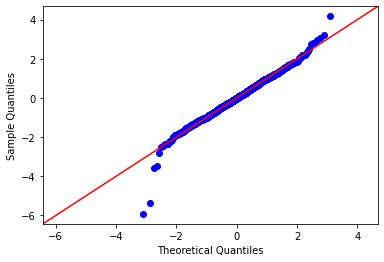

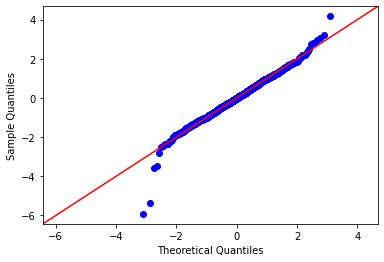

In [29]:
# 잔차 확인
residue = final_model_fit.resid
pred_y = final_model_fit.predict(X_train)
qqplot(residue, fit= True, line='45')

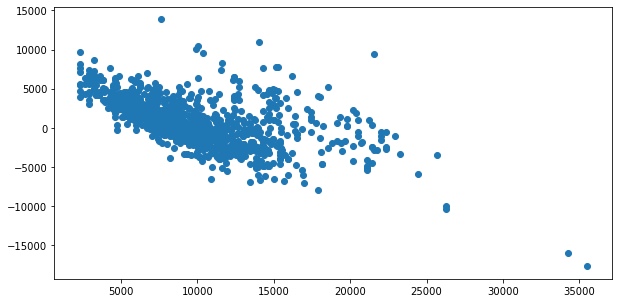

In [36]:
# 잔차 패턴 확인
plt.figure(figsize = (10,5))
plt.scatter(pred_y, residue)

In [ ]:
# 